In [1]:
# import libraries
import numpy as np
import pandas as pd
from joblib import load
import torch
from torch import nn
from skorch import NeuralNetClassifier
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Input the same model that we bulit in the training phase in order to properly read the saved optimised model
class Net(nn.Module):
     def __init__(self, hidden_size=100, nonlin=F.relu):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.nonlin = nonlin
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
 
     def forward(self, x, **kwargs):
        hidden = self.nonlin(self.fc1(x))
        hidden = F.relu(self.fc2(hidden))
        out = F.softmax(self.fc3(hidden), dim=1)
        return out

In [3]:
# import files
mlp = load('MLP_optimised.joblib')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

# Convert dataframes to series and then to tensor
y_test = y_test.squeeze()
x_testTensor = torch.tensor(x_test.to_numpy()).float()
y_testTensor = torch.tensor(y_test.to_numpy()).long()

In [4]:
# See the score of the best model on the test set
mlp.score(x_testTensor,y_testTensor)

0.8360655737704918

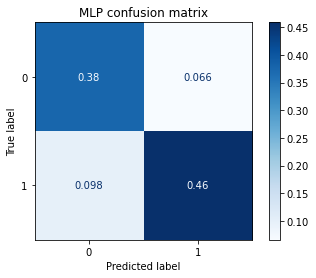

In [5]:
# Plot normalized confusion matrix
disp = plot_confusion_matrix(mlp, x_testTensor, y_testTensor, cmap=plt.cm.Blues, normalize='all')
disp.ax_.set_title('MLP confusion matrix')
plt.show()

In [6]:
# See precision, recall and F1 score
precision,recall,f,support = precision_recall_fscore_support(y_testTensor, mlp.predict(x_testTensor))
print('precision',precision,'\nrecall',recall,'\nF1',f,'\nsupport',support)

precision [0.79310345 0.875     ] 
recall [0.85185185 0.82352941] 
F1 [0.82142857 0.84848485] 
support [27 34]


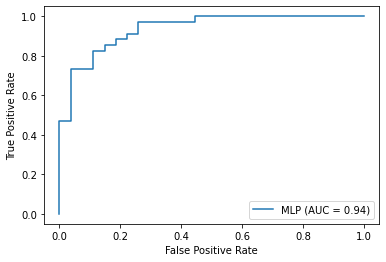

In [7]:
# Visualise ROC curve
metrics.plot_roc_curve(mlp, x_testTensor, y_testTensor, name='MLP')
plt.show()